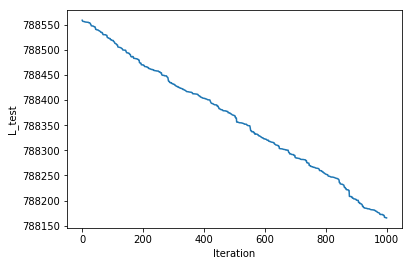

In [1]:
#!/Users/wuyou/anaconda2/envs/py3/
# -*- coding: utf-8 -*-

%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import random

def loadMovieLensTrain(filename='u1.base'):
    '''
    将原始测试集文件读入，并以二维字典的形式存储数据
    '''
    str1 ='./ml-100k/'

    prefs={}
    for line in open(str1+filename,'r'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{}) #设定默认值为None
        prefs[user][movieid]=float(rating)
    return prefs

def loadMovieLensTest(filename='u1.test'):
    '''
    将原始训练集文件读入，并以二维字典的形式存储数据
    '''
    str1 ='./ml-100k/'

    prefs={}
    for line in open(str1+filename,'r'):
        (user,movieid,rating,ts)=line.split('\t')
        prefs.setdefault(user,{}) #设定默认值为None
        prefs[user][movieid]=float(rating)
    return prefs

def transfer_Matrix(M):
    '''
    将读入的数据转换成numpy矩阵以便于后续处理
    '''
    R=numpy.zeros((943,1682))
    for user,items in M.items():
        for item,values in items.items():
            R[int(user)-1][int(item)-1]=values

    return R

def matrix_factorization_SGD(R, tR, P, Q, steps=1000, alpha=0.0002, lambda_P=0.02,lambda_Q=0.02):
    e_diff=numpy.zeros(tR.shape)
    counts=[]
    for step in range(steps):
        e = 0
        for i in range(len(tR)):
            pu2=numpy.dot(P[i,:],P[i,:].T)
            e = e + lambda_P*pu2
            for j in range(len(tR[i])):
                qi2=numpy.dot(Q[:,j].T,Q[:,j])
                e = e + lambda_Q*qi2
                if tR[i][j] > 0:
                    e = e + pow(tR[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
        counts.append(e)
        #if step % 1 ==0:
        #    counts.append(e)
        #    print("Cost after %i th iteration:%f"%(step,e))
        if e < 0.001:
            break
        
        #使用sgd更新p和q的参数
        u=random.randint(1,R.shape[0])-1
        i=random.randint(1,R.shape[1])-1
        E_ui=R[u][i]-numpy.dot(P[u,:],Q[:,i])
        P[u,:]=P[u,:]+alpha*2*(E_ui*Q[:,i].T-lambda_P*P[u,:])
        Q[:,i]=Q[:,i]+alpha*2*(E_ui*P[u,:].T-lambda_Q*Q[:,i])

    return P, Q.T, numpy.array(counts)

base=loadMovieLensTrain()
test=loadMovieLensTest()
R=transfer_Matrix(base)
tR=transfer_Matrix(test)
P=numpy.random.randn(R.shape[0],10)
Q=numpy.random.randn(10,R.shape[1])
P, Q, counts=matrix_factorization_SGD(R,tR,P,Q)

plt.xlabel("Iteration")  
plt.ylabel("L_test")
plt.plot(counts)
plt.legend()  # 让图例生效 

In [4]:
hatR = numpy.dot(P, Q.T)

In [5]:
hatR

array([[  3.94884439,   1.16673789,  -1.63331888, ...,  -0.57582477,
          0.55763809,  -2.91401188],
       [ -2.66715982,  -1.5287109 ,  -0.99068579, ...,   5.59773491,
         -2.86836905,   3.30592781],
       [  5.82514802,   5.16322775,   0.77880314, ..., -11.77511308,
          3.43662043,  -4.88787886],
       ..., 
       [  9.58552765,  -0.68187423,   2.20862905, ...,   3.36550079,
          2.10581087,  -0.77189423],
       [  4.61076569,  -0.76806756,  -0.34113421, ...,   3.27444084,
         -1.54904875,  -0.10175768],
       [ -0.72115502,   0.07676991,   1.67799372, ...,  -8.19947101,
         -2.60792422,   1.62214911]])